In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import csv
import seaborn as sns

In [2]:
path =r'C:/Users/mjc341/desktop/UMAN 1625 A-B testingBaysean/SF_email_reports2'
pathfinal = r'C:/Users/mjc341/desktop/UMAN 1625 A-B testingBaysean/EmailResults2/'
pathexcel =  r'C:/Users/mjc341/desktop/UMAN 1625 A-B testingBaysean/excelresults/'
filenames = glob.glob(path + "/*.csv")

In [3]:
#create a list of filenames from the reports
EM_Results = []
for filename in filenames:
    EM_Results.append(filename[71:])

In [4]:
#create a function that makes a pandas data frame and converts str obj to datetime
#SFR  is SalesForce Email Results Report
def FRAME(SFR):
    name = pd.read_csv(path + "/"+ SFR, skiprows=3, engine='python', index_col=False)
    name = name [['IntervalStartTime','UniqueOpened']]
    df = pd.DataFrame(name)
    name['IntervalStartTime'] = pd.to_datetime(name.IntervalStartTime)
    return (df)

def TITLE(SFR):
    file = open(path + "/"+ SFR,'r')
    csvreader=csv.reader(file)
    header = next(csvreader)
    line2 =next(csvreader)
    EmailFileName = SFR[:-4]
    return EmailFileName

def HEADER(SFR):
    file = open(path + "/"+ SFR,'r')
    csvreader=csv.reader(file)
    header = next(csvreader)
    line2 =next(csvreader)
    SUBJ=line2[7]
    return SUBJ

def TOPEN(SFR):
    m = pd.read_csv(path + "/"+ SFR, skiprows=3, engine='python', index_col=False)
    m = m [['IntervalStartTime','Sent','UniqueOpened']]
    M = pd.DataFrame(m)
    M['IntervalStartTime'] = pd.to_datetime(M.IntervalStartTime)
    M['HourCount'] = range(len(M))
    M['RunTotal']= M.UniqueOpened.cumsum()
    TO = M['UniqueOpened'].sum()
    TO = str(TO)
    return TO

def OPENRATE(SFR):
    name = pd.read_csv(path + "/"+ SFR, skiprows=3, engine='python', index_col=False)
    name = name [['IntervalStartTime','Sent','Bounced', 'UniqueOpened','UniqueClicked','Unsubscribed']]
    TSent = name['Sent'].sum()
    TOpen = name['UniqueOpened'].sum()
    TUnsubsc= name['Unsubscribed'].sum()
    TBounce= name['Bounced'].sum()
    FSent =TSent - TBounce
    FOpenR = round((TOpen/FSent*100),1)
    FOPENR = str(FOpenR) + "%"
    return FOPENR

def SENT(SFR):
    name = pd.read_csv(path + "/"+ SFR, skiprows=3, engine='python', index_col=False)
    name = name [['IntervalStartTime','Sent','Bounced', 'UniqueOpened','UniqueClicked','Unsubscribed']]
    TSent = name['Sent'].sum()
    TBounce= name['Bounced'].sum()
    FSENT = TSent - TBounce
    Fsent =str(FSENT)
    return Fsent

def findslope(SFR):
    m = pd.read_csv(path + "/"+ SFR, skiprows=3, engine='python', index_col=False)
    m = m [['IntervalStartTime','UniqueOpened']]
    M = pd.DataFrame(m)
    M['IntervalStartTime'] = pd.to_datetime(M.IntervalStartTime)
    M['HourCount'] = range(len(M))
    y= max(M.UniqueOpened)
    t = min(M.UniqueOpened)
    x =  M.loc[M['UniqueOpened']== t, 'HourCount'].iloc[0]
    m = -y/x
    m = round(m,2)
    m= str(m)
    return m

def CRIT_HOUR(SFR):
    m = pd.read_csv(path + "/"+ SFR, skiprows=3, engine='python', index_col=False)
    m = m [['IntervalStartTime','Sent','UniqueOpened']]
    M = pd.DataFrame(m)
    M['IntervalStartTime'] = pd.to_datetime(M.IntervalStartTime)
    M['HourCount'] = range(len(M))
    M['RunTotal']= M.UniqueOpened.cumsum()
    TOpen = M['UniqueOpened'].sum()
    Q = round(TOpen*.75,0)
    Q = int(Q)
    HrThreeQ =  M.loc[M['RunTotal']> Q,'HourCount'].iloc[0]
    HrThreeQ = str(HrThreeQ)
    return HrThreeQ

def EMdf(SFR):
    a= FRAME(SFR)
    b= TITLE(SFR)
    c= HEADER(SFR)
    f= OPENRATE(SFR)
    O= TOPEN(SFR)
    g= SENT(SFR)
    h= findslope(SFR)
    HR= CRIT_HOUR(SFR)
    d = a.plot(x="IntervalStartTime", y = 'UniqueOpened')
    d.set(title = 'Email Response Rate for ' + b)
    d.annotate('Email Header:\n' + c + '\n Open Rate: ' + f +'\n Total Opened '+ O +'\n Total Sent '+ g + '\n Slope '+ h + '\n 75% of Emails were opened in '+ HR + 'hrs.',
               xy = (100,125),xycoords='figure points')
    return d

In [5]:
#this is the test file
SFR = 'Parking.csv'

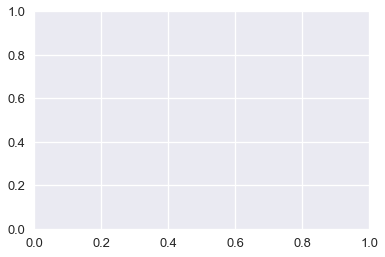

In [6]:
sns.set_style('darkgrid')
sns.set_context('talk')
color = sns.color_palette("Dark2",6)
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)


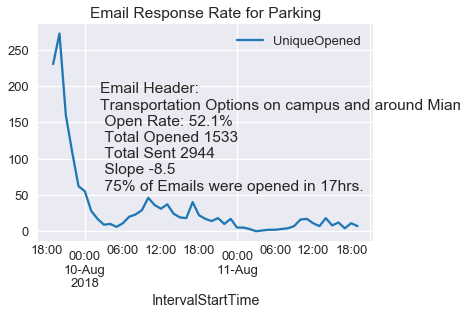

In [7]:
#check the stringed function list
for fn in [FRAME,TITLE,HEADER,OPENRATE,TOPEN, SENT,findslope,CRIT_HOUR, EMdf]:
    fn(SFR)

In [8]:
pathfinal

'C:/Users/mjc341/desktop/UMAN 1625 A-B testingBaysean/EmailResults2/'

In [9]:
EM_Results

['ALEKS_Dom.csv',
 'ALEKS_INTL.csv',
 'ALEKS_XFR.csv',
 'ARCH_Reg_Remind_Wave_2.csv',
 'Cancel_Admission.csv',
 'COE_Welcome_Ltr(A)_Dom1.csv',
 'COE_Welcome_Ltr(A)_Dom2.csv',
 'COE_Welcome_Ltr_(B)_INTL1.csv',
 'COE_Welcome_Ltr_(B)_INTL2.csv',
 'COMM_Intro.csv',
 'COM_Reg_Remind_Wve_2.csv',
 'COM_Welcome_Ltr1.csv',
 'COM_Welcome_Ltr2.csv',
 'ED_&_Human_Dev_Reg_Remind_Wve_2.csv',
 'ED_Welcome_Ltr1.csv',
 'ED_Welcome_Ltr2.csv',
 'FROST_#3a.csv',
 'FROST_Reg_Remind_Wve_2.csv',
 'FROST_welcome_ltr.csv',
 'Immun&Health_Ins_#14.csv',
 'INTL_ISSS_#8.csv',
 'INTL_ISSS_#8a.csv',
 'INTL_Resources_Mentor_#17b.csv',
 'Intro_to_Fall_Comm_#2.csv',
 'MBS_Message#2_.csv',
 'MBS_Reg_remin_Wve-2.csv',
 'MBS_Welcome_ltr.csv',
 'Mentorship_#19.csv',
 'NUR_Reg_Remind_Wave_2.csv',
 'Orientation_Webinars_#10.csv',
 'OrientGreatStartHoriz_INTL_#4.csv',
 'Outcomes_Values_of_UM_#15.csv',
 'Parking.csv',
 'Quest_abt_Money_#16.csv',
 'Reg_Now_Open_#9a.csv',
 'Reg_Now_Open_#9_.csv',
 'Reg_Remind_#12.csv',
 'Reg_tim

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

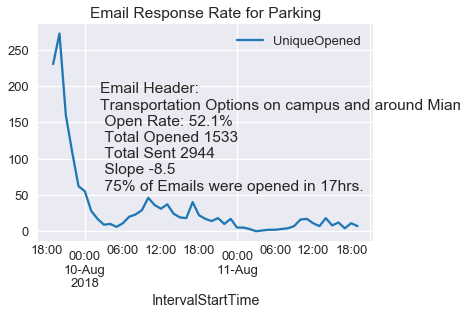

In [10]:
#the lp function will create the plot and save as a .png file to the desktop

def lp(SFR):
    for fn in [FRAME,TITLE,HEADER,OPENRATE,SENT,findslope,EMdf]:
        fn(SFR)
        plt.savefig(pathfinal +'/' + SFR[:-4] +'.png')
        plt.show(SFR)
lp(SFR)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

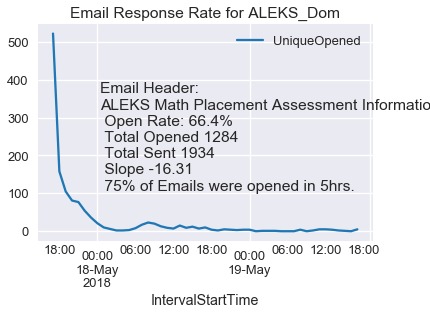

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

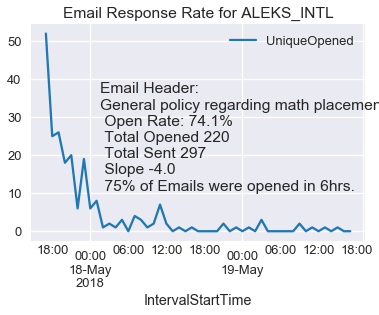

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

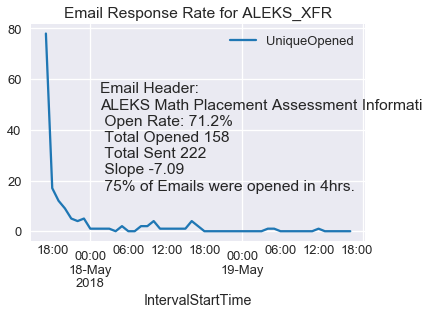

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

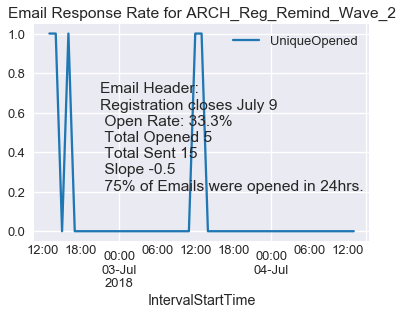

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

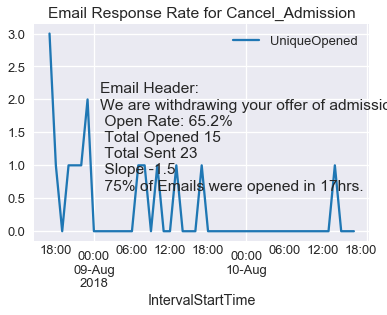

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

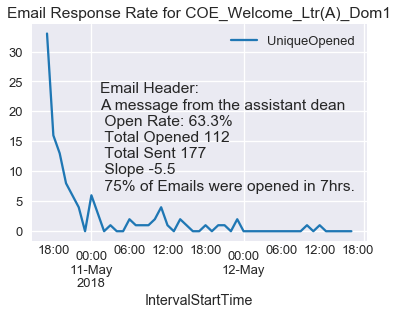

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

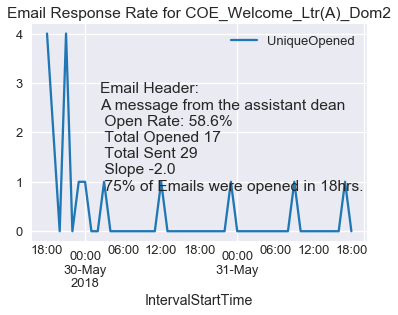

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

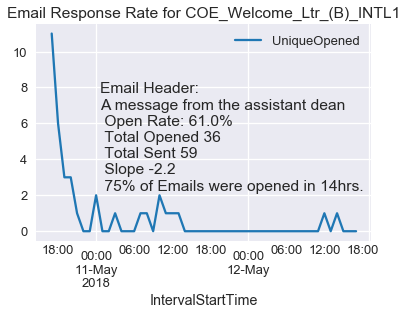

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

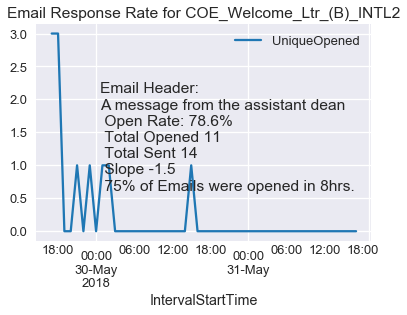

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

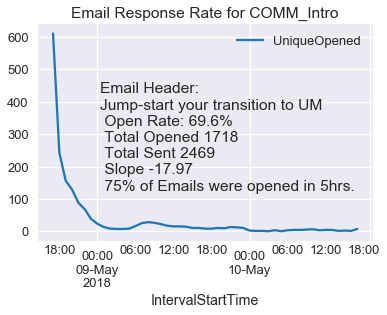

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

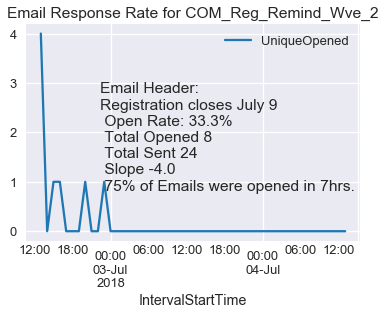

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

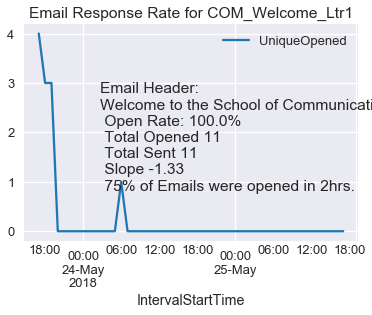

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

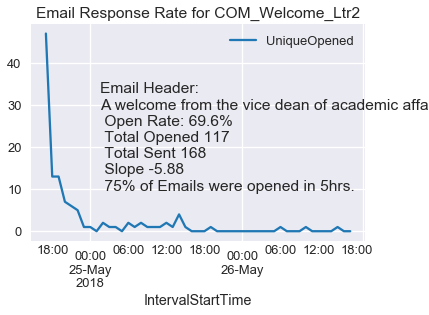

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

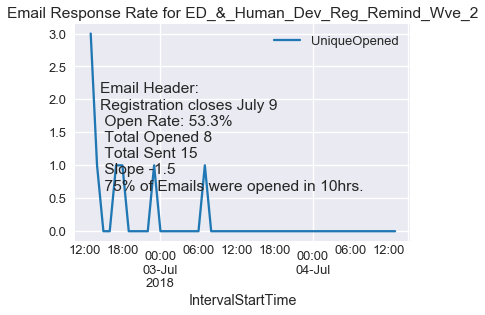

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

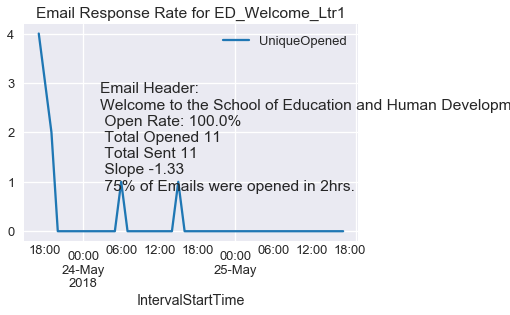

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

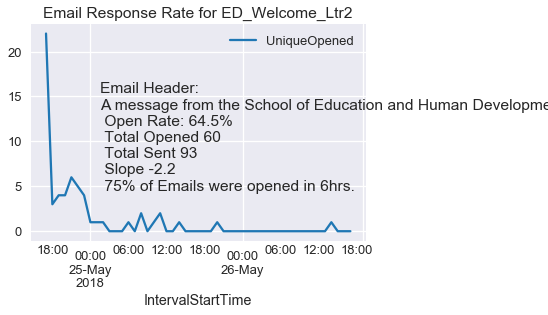

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

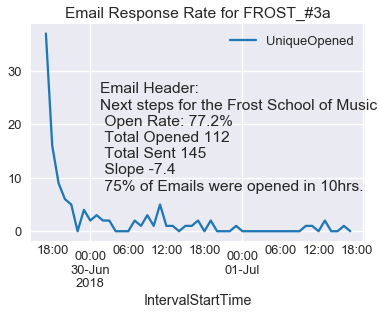

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

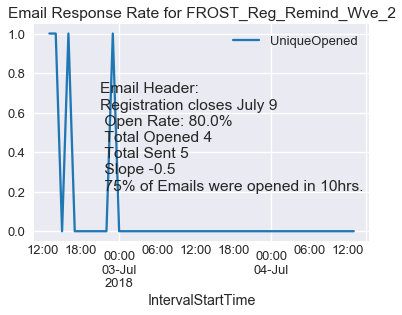

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

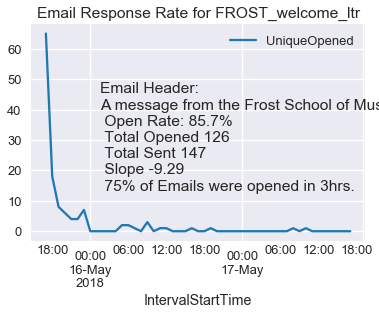

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

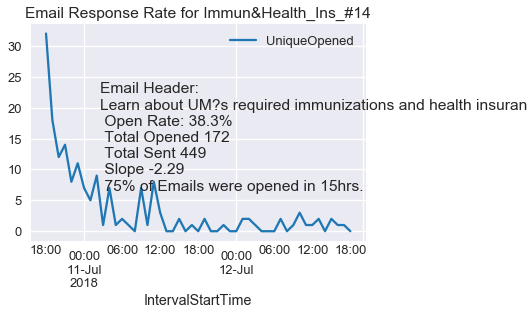

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

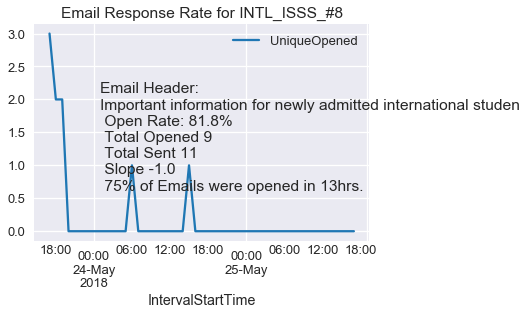

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

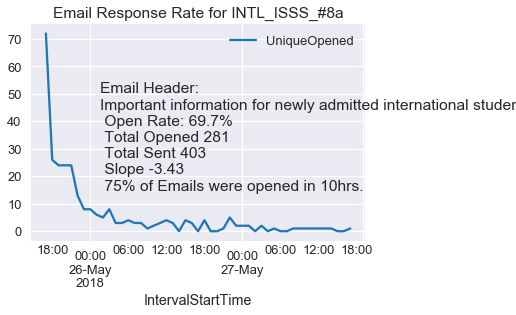

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

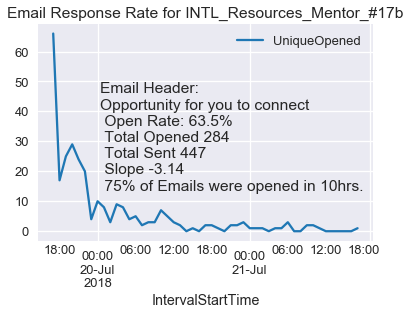

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

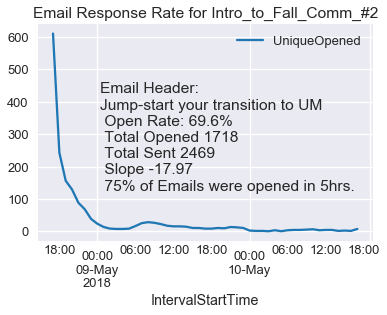

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

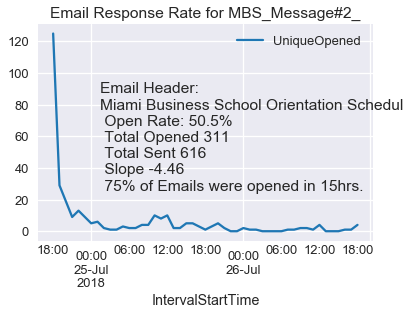

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

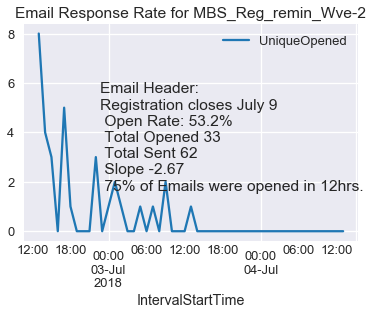

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

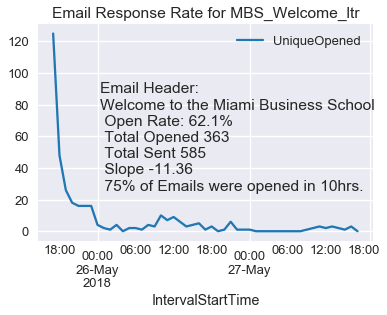

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

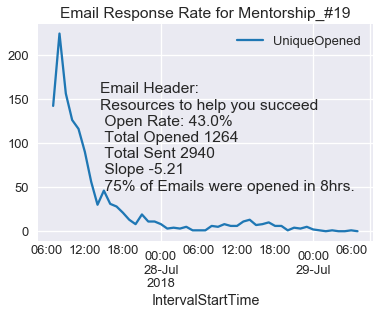

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

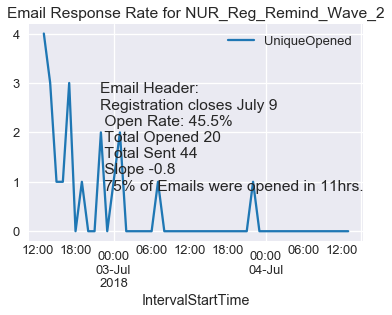

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

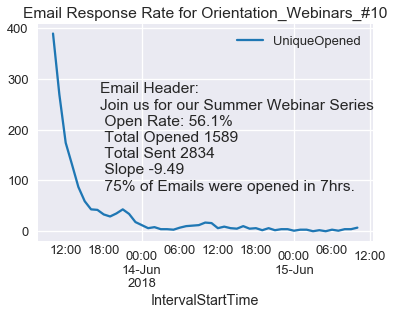

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

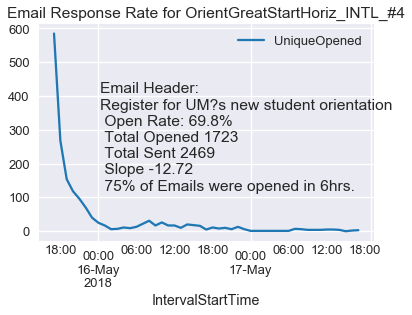

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

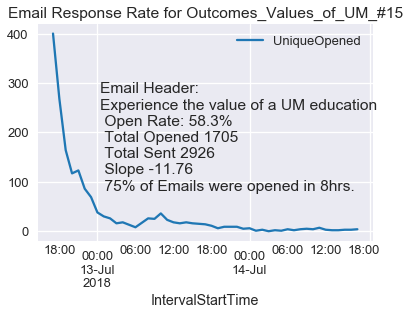

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

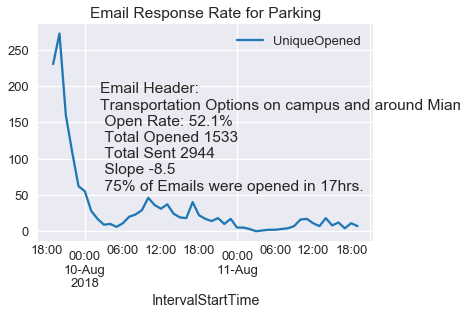

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

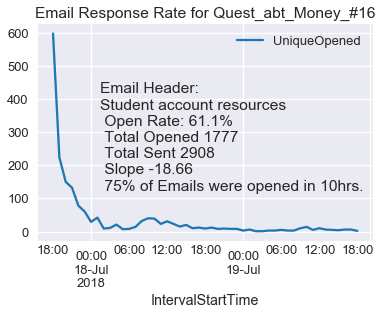

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

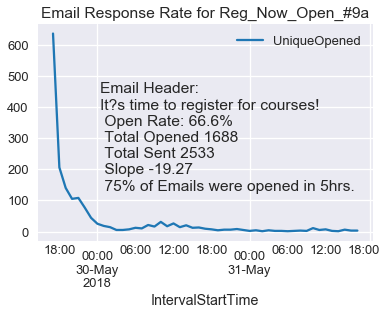

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

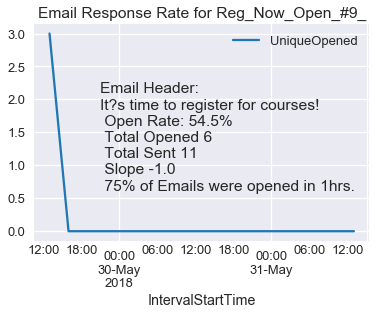

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

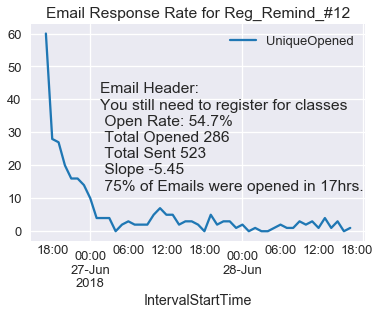

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

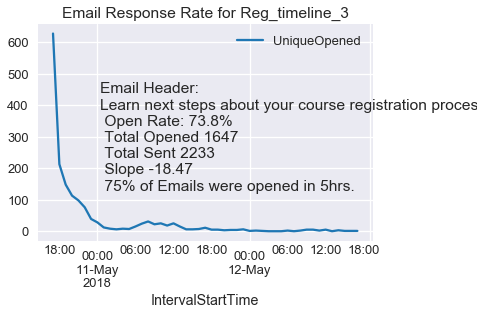

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

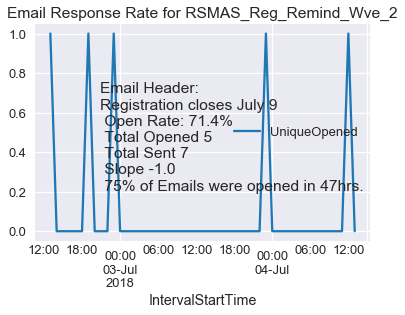

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

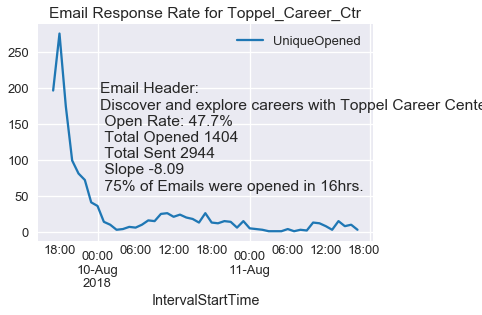

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

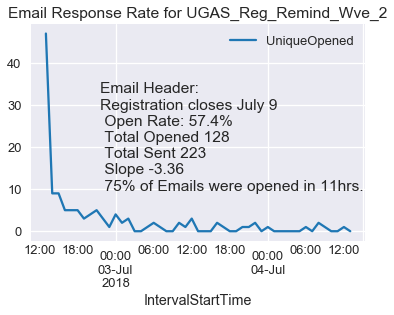

In [11]:
#had to remove the Adobe and Frost #3 files because their was a dived by 0 error due to the low number of responses
#this for loop will create all of the .png files in the list
#for item in EM_Results:     
       #lp(item)
 

In [12]:
#the code below is to extract 1 .png file at a time
#SFR = 'Quest_abt_Money_#16.csv'

In [13]:
#pathfinal

In [14]:
#def lp(SFR):
   # for fn in [FRAME,TITLE,HEADER,OPENRATE,SENT,findslope,EMdf]:
        #fn(SFR)
       # plt.savefig(pathfinal + SFR[:-4] +'.png')
       # plt.show(SFR)
#lp(SFR)